<a href="https://colab.research.google.com/github/DoraXochitl/DCDP_2022/blob/main/Copia_de_Copia_de_Practica1_EstadisticaWoANS_Dora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica1_EstadisticaWoANS.ipynb)

Estadística con Python
---

Como vimos en la unidad de Análisis Estadístico de Datos, podemos construir diferentes tipos de distribuciones, gracias a la simulación Monte Carlo.

En el siguiente ejercicio realizaremos una mezcla de los siguientes aspectos:

#### Creación de una muestra con "Ruido"

En este punto, debemos realizar la simulación numérica para construir datos sin "distribución" aparente, para posteriormente aplicar pruebas estadísticas (detección de outliers) y posteriormente realizar un análisis del antes y después.

Empezaremos con la construcción de una muestra con distribución normal

crearMuestra(mu, sigma), esta función devuelve una nueva muestra generada con parámetros de tendencia central mu (o media) y sigma (o desviación estándar).

In [ ]:
import numpy as np # importando numpy
from numpy.random import seed
import seaborn as sns
sns.set()
seed(12345)
def crearMuestra(mu, sigma, size):
    """
    Tip:
    Primero debemos instanciar la semilla aleatoria
    para posteriormente construir nuestros datos 
    que recibe como parámetros mu, sigma y size
    """
    datos = np.random.normal(loc=mu, scale=sigma, size=size)

    return  datos

In [ ]:
#Construimos 4 conjunto de datos
mu    = [5 ,20, 3, 6]
sigma = [10,30, 7,12]
n = [20, 30, 45, 15]

# creación de conjuntos
datos_1 = crearMuestra(mu[0], sigma[0], n[0])
datos_2 = crearMuestra(mu[1], sigma[1], n[1])
datos_3 = crearMuestra(mu[2], sigma[2], n[2])
datos_4 = crearMuestra(mu[3], sigma[3], n[3])





In [ ]:
datos_1

array([  2.95292341,   9.78943338,  -0.19438715,  -0.55730304,
        24.65780573,  18.93405833,   5.92907877,   7.81746153,
        12.69022568,  17.46434736,  15.07189358,  -7.96221109,
         7.74991633,   7.28912879,  18.52916835,  13.86429341,
       -15.0163731 ,   1.28157463,  21.6902531 ,   0.61430264])

In [ ]:
datos_graf = [datos_1, datos_2, datos_3, datos_4]
datos_graf[0]

array([  2.95292341,   9.78943338,  -0.19438715,  -0.55730304,
        24.65780573,  18.93405833,   5.92907877,   7.81746153,
        12.69022568,  17.46434736,  15.07189358,  -7.96221109,
         7.74991633,   7.28912879,  18.52916835,  13.86429341,
       -15.0163731 ,   1.28157463,  21.6902531 ,   0.61430264])

Ahora, grafiquemos los datos para visualizar que hasta este momento, efectivamente son muestras con distribución normal que se encuentras desplazadas en la tendencia central y tienen una dispersión diferente de igual manera.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

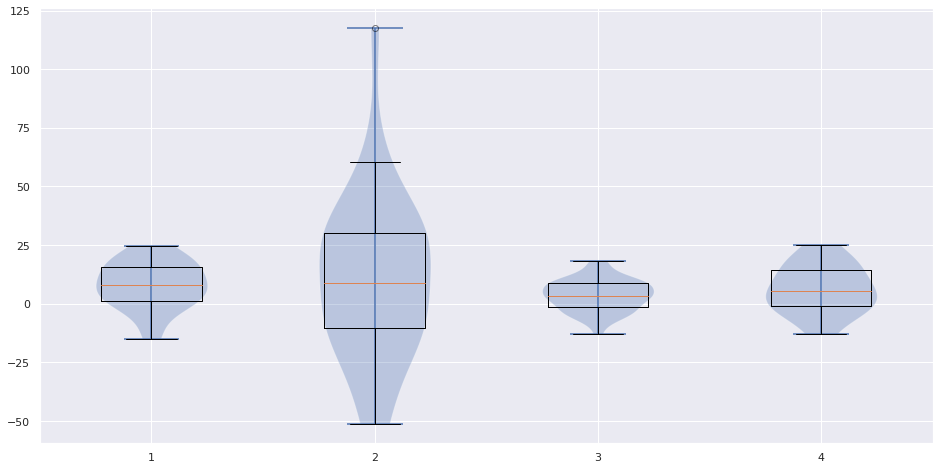

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns
import pandas as pd
datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(16,8))

# Creando el subgrafico
ax = fig.add_subplot(111)
# creando el grafico de cajas
bp = ax.boxplot(datos_graf)
ap = ax.violinplot(datos_graf)
# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)


Vamos a poder apreciar que algunos conjuntos de datos presentan datos atípicos
(a esto en estadística comunmente se les llama Discordant Outliers), ya que generan
distorsión de los datos. 

Esto posiblemente nos pueda generar que las pruebas de normalidad nos arrojen como
resultado que no presentan una Distribución Gaussiana.

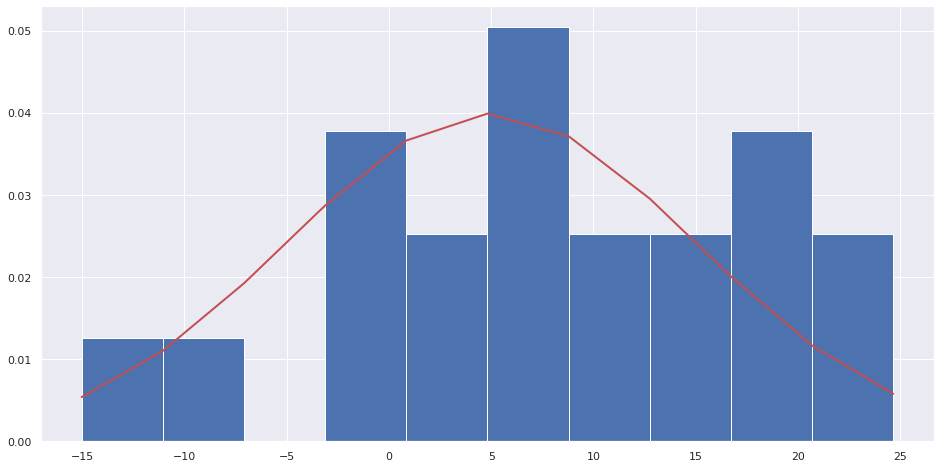

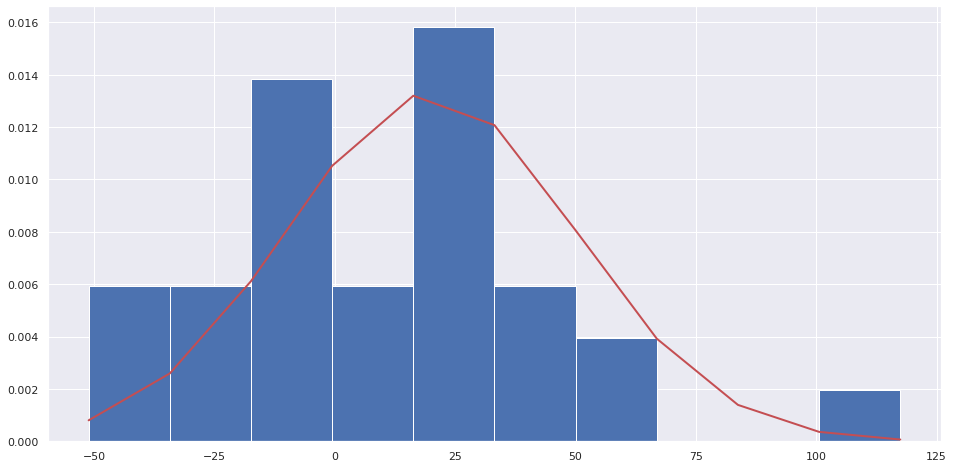

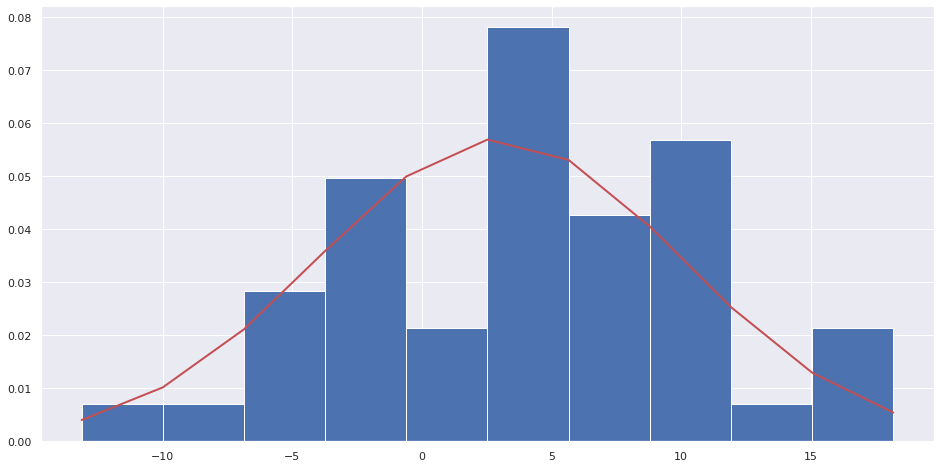

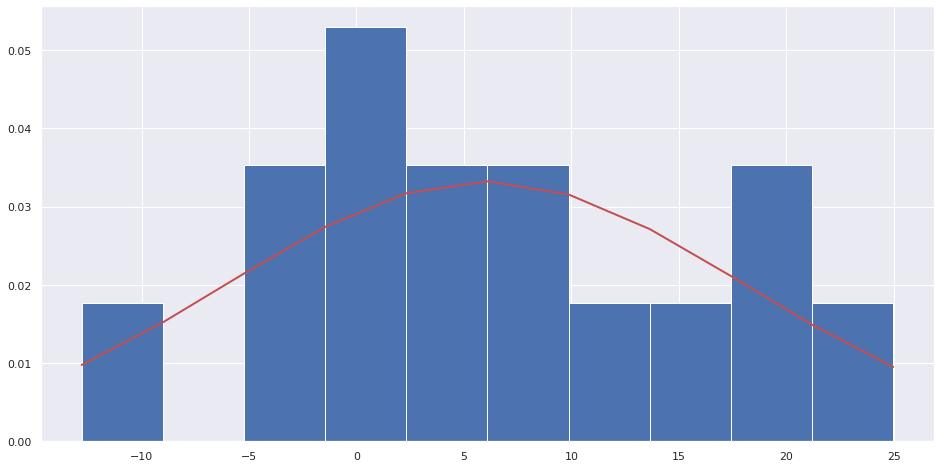

In [ ]:
#Generemos un histograma para un mejor entendimiento de lo anterior
#Recuerda los valores de mu y sigma de cada conjunto de datos
for i in range(4):
    plt.figure(figsize=(16,8))
    cuenta, cajas, ignorar = plt.hist(datos_graf[i], 10,density=True)
    norma1 = plt.plot(cajas, 1/(sigma[i] * np.sqrt(2 * np.pi)) *
    np.exp( - (cajas - mu[i])**2 / (2 * sigma[i]**2) ),
    linewidth=2, color='r')
    plt.show()

En esta sección se dará una breve introducción sobre este tema que puede causar muchos dolores de cabeza al estar aprendiendo acerca del manejo de datos. Aplicaremos la prueba de shapiro (W - Test) a los datos generados anteriormente.

stat=0.975, p=0.847
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


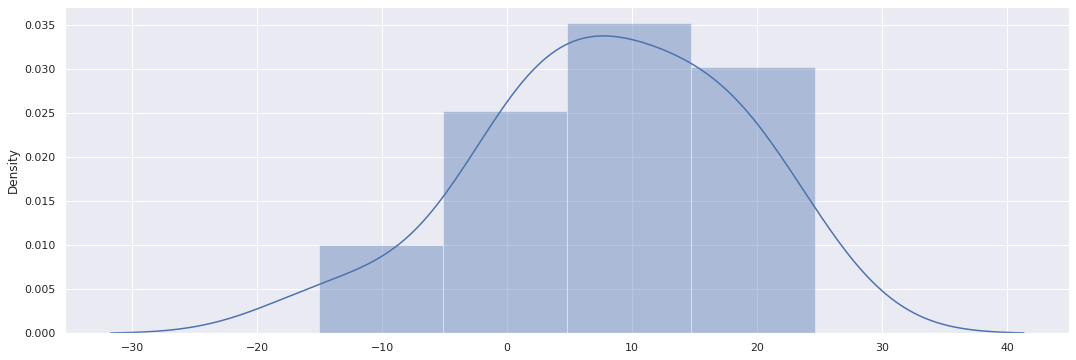

stat=0.949, p=0.160
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


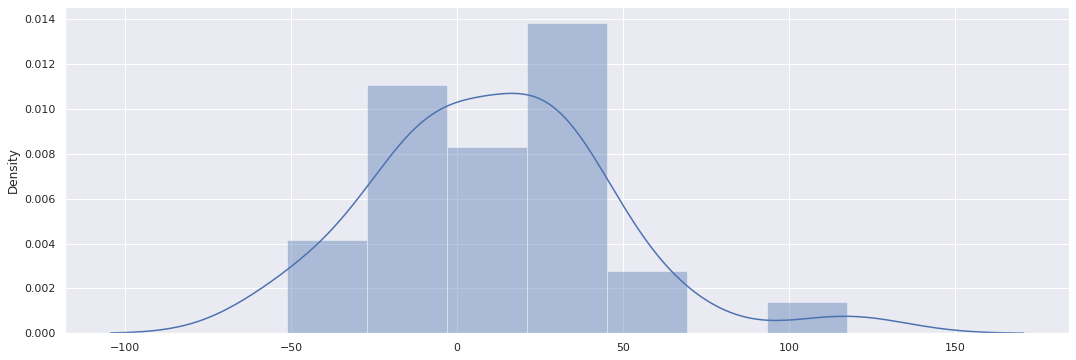

stat=0.982, p=0.685
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


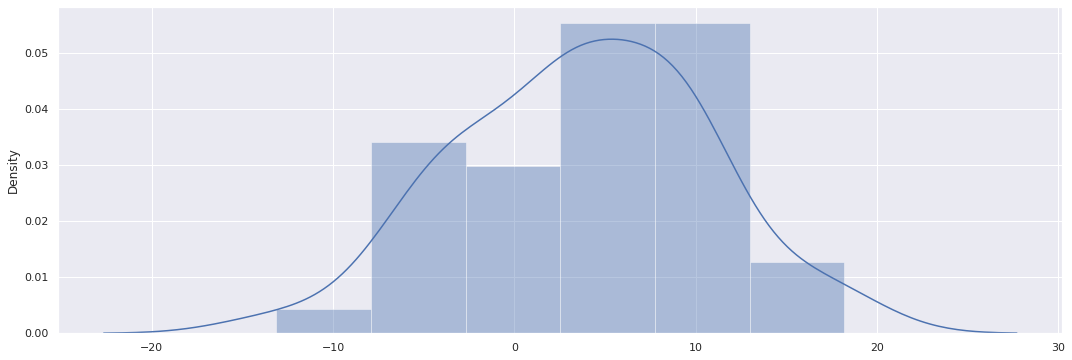

stat=0.981, p=0.973
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


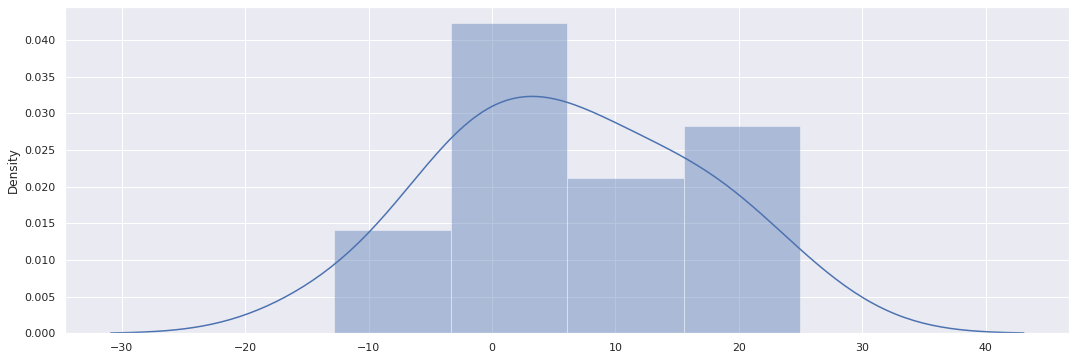

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
import seaborn as sns

#presenta lo mismo para cada uno de los conjuntos de datos <rellena>


#En este ejercicio trabajaremos con los valores críticos de la prueba de Shapiro, 
#favor de consultar los valores críticos para los demás casos

#Recordaremos que nuestra H0 será -> No es Gaussiana  stat <= cv
#Mientras que la H1 será -> Es Gaussiana              stat  > cv

#https://scistatcalc.blogspot.com/2013/09/critical-value-of-w-statistic.html?m=0

#n=20,30,45,15
cv_datos  = [0.905, 0.927, 0.945,0.881]

for i in range(4):
    stat, p = shapiro(datos_graf[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if stat <= cv_datos[i]:
             print('Sample does not look Gaussian (reject H0)')
    else:
        print('Sample looks Gaussian (fail to reject H0)')
        plt.figure(figsize=(18,6))         
        sns.distplot(datos_graf[i])
        plt.show()        
  

A pesar de que existen diversas pruebas de discordancia para la detección de valores
atípicos, es una técnica que pocas veces se utiliza con este tipo de estadísticos.

Mayor información en el siguiente artículo: [Verma et al, 2008](https://dialnet.unirioja.es/servlet/articulo?codigo=2912581)

---

En el siguiente bloque, aplicaremos una técnica basada en Dixon Q test.

In [ ]:
def q_test(dataset):
    return (dataset[1] - dataset[0])/(dataset[len(dataset)-1] - dataset[0])  

In [ ]:
#Probaremos con la aplicación de la prueba 1 sola vez, se deja al usuario
#que pueda modificar el código hasta que la H0 sea verdadera

#H1 -> valor discordante   recordando que calcularemos un estadístico stat
#y lo compararemos contra el valor crítico de la prueba de discordancia

#http://www.statistics4u.com/fundstat_eng/cc_outlier_tests_dixon.html
#<rellena>
# Tamaños de muestras
# n=20,30,45,15

# critical values para un alpha del 0.05 (o CL de 95%)
cv = [0.3005, 0.2594, 0.2744, 0.3991]

# datos_1
qtestCV_datos1  = cv[0]
stat1 = q_test(np.sort(datos_1))
print('stat1=%.3f, p1=%.3f' % (stat1, qtestCV_datos1))

if stat1 < qtestCV_datos1:
    print('No se rechaza Ho: No outlier')
else:
    print('Se rechaza Ho: Outlier')
    
#Probar para cada conjunto de datos  2, 3 Y 4

# datos_2
qtestCV_datos2  = cv[1]
stat2 = q_test(np.sort(datos_2))
print('stat1=%.3f, p1=%.3f' % (stat2, qtestCV_datos2))

if stat2 < qtestCV_datos2:
  print('No se rechaza Ho: No outlier')
else:
    print('Se rechaza Ho: Outlier')

# datos_3
qtestCV_datos3  = cv[2]
stat3 = q_test(np.sort(datos_3))
print('stat3=%.3f, p3=%.3f' % (stat3, qtestCV_datos3))

if stat3 < qtestCV_datos3:
  print('No se rechaza Ho: No outlier')
else:
    print('Se rechaza Ho: Outlier')

# datos_4
qtestCV_datos4  = cv[3]
stat4 = q_test(np.sort(datos_4))
print('stat4=%.3f, p4=%.3f' % (stat4, qtestCV_datos4))

if stat4 < qtestCV_datos4:
  print('No se rechaza Ho: No outlier')
else:
    print('Se rechaza Ho: Outlier')



stat1=0.178, p1=0.300
No se rechaza Ho: No outlier
stat1=0.002, p1=0.259
No se rechaza Ho: No outlier
stat3=0.169, p3=0.274
No se rechaza Ho: No outlier
stat4=0.202, p4=0.399
No se rechaza Ho: No outlier


Hubo valores discordantes?

Las muestras si eran gaussianas?

Este ejercicio fue para ejemplificar como uno puede trabajar con cada muestra de forma univariada, 
algo importante en el tratamiento estadístico de los datos.

Recordar que siempre es necesario aplicar pruebas de normalidad con datos experimentales,
para posteriormente realizar limpieza de los mismos, estos se deben considerar los pasos 
esenciales previo a cualquier análisis estadístico de los datos.